In [ ]:
!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets

In [ ]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import os

import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/frankpereny/broken-eggs")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: hasithachathuranga
Your Kaggle Key: ··········


100%|██████████| 36.2M/36.2M [00:00<00:00, 79.4MB/s]


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [ ]:
import shutil

# Specify the path to the folder you want to delete
folder_path = '/content/broken-eggs/train/empty'

# Use shutil module to remove the directory and its contents
try:
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' deleted successfully.")
except OSError as e:
    print(f"Error: {folder_path} : {e.strerror}")

Error: /content/broken-eggs/train/empty : No such file or directory


In [ ]:
train_data_dir  ="/content/broken-eggs/train"
test_data_dir ="/content/broken-eggs/test"

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         subset='training',
                                                         validation_split=0.1,
                                                         seed=42)

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                              batch_size=BATCH_SIZE,
                                                              image_size=IMAGE_SIZE,
                                                              subset='validation',
                                                              validation_split=0.1,
                                                              seed=42)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                        batch_size=BATCH_SIZE,
                                                        image_size=IMAGE_SIZE)

Found 352 files belonging to 2 classes.
Using 317 files for training.
Found 352 files belonging to 2 classes.
Using 35 files for validation.
Found 17 files belonging to 2 classes.


In [ ]:
class_names = train_data.class_names
class_names

['crack', 'good']

In [ ]:
for image_batch, label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


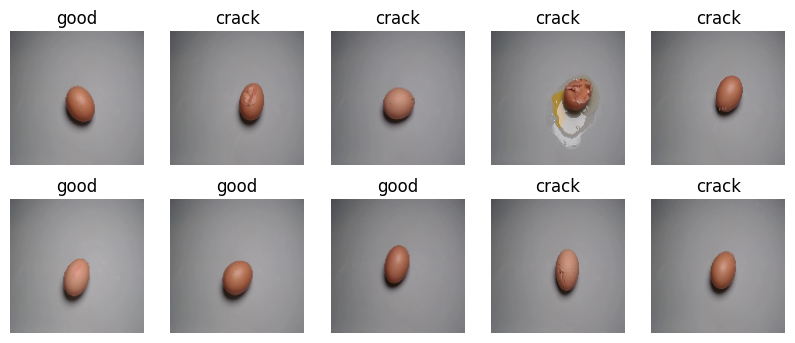

In [ ]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[ 80.        81.        83.      ]
   [ 80.        81.        85.      ]
   [ 82.6875    83.6875    87.6875  ]
   ...
   [107.234375 106.234375 111.234375]
   [105.       106.       110.      ]
   [103.       107.       110.      ]]

  [[ 82.0625    82.3125    84.78125 ]
   [ 80.375     84.1875    87.25    ]
   [ 83.890625  84.890625  88.953125]
   ...
   [108.28125  107.28125  112.28125 ]
   [107.       108.       112.      ]
   [105.9375   105.0625   110.      ]]

  [[ 78.984375  82.734375  86.234375]
   [ 81.078125  84.078125  89.078125]
   [ 84.421875  83.859375  87.546875]
   ...
   [107.25     108.25     113.25    ]
   [109.5625   110.5625   114.5625  ]
   [107.421875 108.421875 112.421875]]

  ...

  [[113.75     114.       116.      ]
   [113.       114.       118.      ]
   [114.859375 115.859375 119.859375]
   ...
   [127.5625   128.5625   130.5625  ]
   [128.5625   128.5625   130.5625  ]
   [128.3125   126.8125   129.5625  ]]

  [[113.75     114.       116.    

In [ ]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))

In [ ]:
for image,label in train_data.take(1):
  for i in range(1):
    print(image)

tf.Tensor(
[[[[0.29142156 0.29828432 0.29730392]
   [0.29411766 0.29803923 0.30588236]
   [0.2901961  0.30588236 0.31764707]
   ...
   [0.40055147 0.3966299  0.4201593 ]
   [0.3865196  0.39044118 0.40612745]
   [0.3855392  0.38946077 0.40514705]]

  [[0.2977941  0.29822305 0.3       ]
   [0.30269608 0.30294117 0.3107843 ]
   [0.30588236 0.30980393 0.3254902 ]
   ...
   [0.40753677 0.41145834 0.4310662 ]
   [0.39393383 0.3978554  0.41746324]
   [0.39191177 0.39583334 0.4154412 ]]

  [[0.29803923 0.30588236 0.3019608 ]
   [0.3019608  0.30588236 0.3137255 ]
   [0.30251226 0.30643383 0.31770834]
   ...
   [0.39932597 0.3954044  0.4189338 ]
   [0.40490195 0.40882352 0.42843136]
   [0.39871323 0.4026348  0.42224264]]

  ...

  [[0.41568628 0.41960785 0.43529412]
   [0.42745098 0.42745098 0.43529412]
   [0.43694854 0.43694854 0.44479167]
   ...
   [0.48235294 0.4745098  0.49411765]
   [0.48235294 0.4745098  0.49068627]
   [0.47843137 0.47058824 0.48235294]]

  [[0.4194853  0.42340687 0.43125 

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [215]:
model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Conv2D(128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPooling2D())

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [185]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 128)      

In [216]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [217]:
start_time = time.time()

history = model.fit(train_data,
                    epochs=45,
                    validation_data=validation_data)

end_time = time.time()

Epoch 1/45
10/10 [==============================] - 14s 1s/step - loss: 0.6789 - accuracy: 0.5394 - val_loss: 4.0590 - val_accuracy: 0.5429
Epoch 2/45
10/10 [==============================] - 11s 1s/step - loss: 0.6568 - accuracy: 0.5962 - val_loss: 3.6281 - val_accuracy: 0.5429
Epoch 3/45
10/10 [==============================] - 11s 1s/step - loss: 0.6222 - accuracy: 0.6782 - val_loss: 6.7023 - val_accuracy: 0.5429
Epoch 4/45
10/10 [==============================] - 12s 1s/step - loss: 0.6474 - accuracy: 0.6309 - val_loss: 6.6008 - val_accuracy: 0.5429
Epoch 5/45
10/10 [==============================] - 11s 1s/step - loss: 0.6384 - accuracy: 0.6751 - val_loss: 5.0216 - val_accuracy: 0.5429
Epoch 6/45
10/10 [==============================] - 10s 930ms/step - loss: 0.5722 - accuracy: 0.7129 - val_loss: 3.2813 - val_accuracy: 0.5429
Epoch 7/45
10/10 [==============================] - 12s 1s/step - loss: 0.5716 - accuracy: 0.7003 - val_loss: 1.8908 - val_accuracy: 0.5429
Epoch 8/45
10/10 

In [ ]:
history.history

{'loss': [0.4717353880405426,
  0.43402576446533203,
  0.43741941452026367,
  0.4430524706840515,
  0.4681512117385864,
  0.47465187311172485,
  0.44361644983291626,
  0.4600442945957184,
  0.44681763648986816,
  0.4302031099796295,
  0.44213396310806274,
  0.3988480269908905,
  0.4262624979019165,
  0.3932364583015442,
  0.41174808144569397,
  0.4184206426143646,
  0.40755966305732727,
  0.3731828033924103,
  0.410722553730011,
  0.5266172289848328,
  0.4690544009208679,
  0.42238980531692505,
  0.4141165614128113,
  0.3929448127746582,
  0.4007033705711365,
  0.41228270530700684,
  0.3995547294616699,
  0.39918798208236694,
  0.41190052032470703,
  0.4075568616390228,
  0.36467278003692627,
  0.429729700088501,
  0.39074236154556274,
  0.3766554594039917,
  0.4169275462627411,
  0.35937681794166565,
  0.40393221378326416,
  0.40987062454223633,
  0.3633023202419281,
  0.34820500016212463,
  0.38866859674453735,
  0.35527274012565613,
  0.36277511715888977,
  0.34785324335098267,
  0.

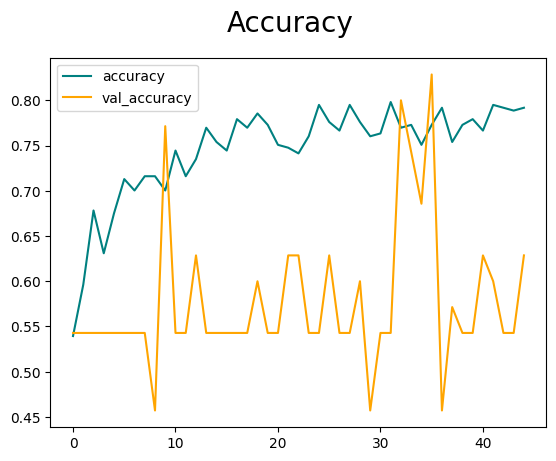

In [218]:
fig = plt.figure()
plt.plot(history.history['accuracy'],color='teal',label='accuracy')
plt.plot(history.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend()
plt.show()

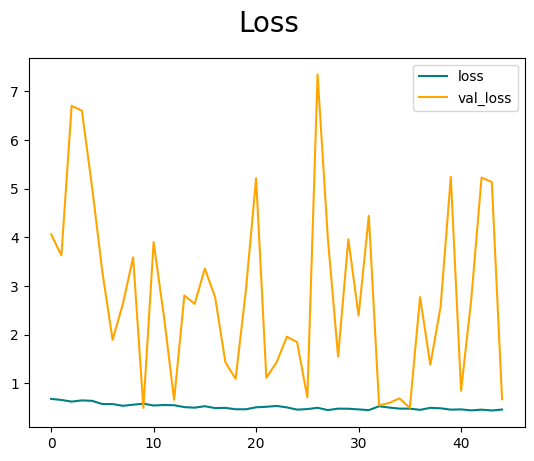

In [219]:
fig = plt.figure()
plt.plot(history.history['loss'],color='teal',label='loss')
plt.plot(history.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend()
plt.show()

In [220]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()

In [221]:
for batch in test_data.as_numpy_iterator():
  x,y = batch
  yhat = model.predict(x)
  precision.update_state(y, yhat)
  recall.update_state(y, yhat)
  accuracy.update_state(y, yhat)

1/1 [==============================] - 0s 250ms/step


In [222]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.6923077>

In [223]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.9>

In [224]:
accuracy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7058824>

In [225]:
!pip install opencv-python

In [226]:
import cv2

In [227]:
resized_image = tf.image.resize(image, IMAGE_SIZE)
scaled_image = resized_image/255

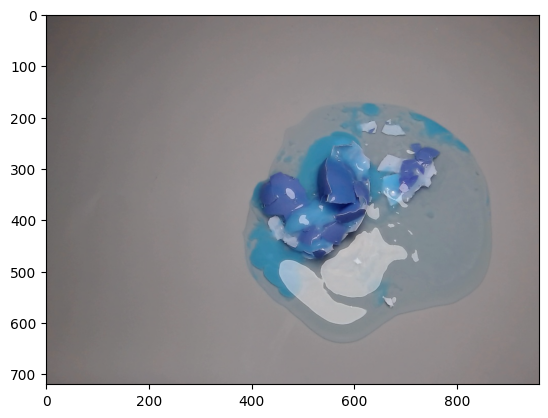

In [228]:
image = cv2.imread("/content/broken-eggs/test/crack/2023-04-09 21_17_38.016066.jpg")
plt.imshow(image)
plt.show()

In [229]:
scaled_image

<tf.Tensor: shape=(128, 128, 3), dtype=float32, numpy=
array([[[0.3254902 , 0.30588236, 0.3019608 ],
        [0.32156864, 0.30588236, 0.3019608 ],
        [0.32647058, 0.30686274, 0.29509804],
        ...,
        [0.43235293, 0.40098038, 0.40098038],
        [0.41789216, 0.3865196 , 0.3865196 ],
        [0.42745098, 0.39215687, 0.38039216]],

       [[0.32536766, 0.29693627, 0.2959559 ],
        [0.32132354, 0.30563724, 0.30171567],
        [0.3298407 , 0.31415442, 0.31023285],
        ...,
        [0.4389706 , 0.3997549 , 0.3997549 ],
        [0.43137255, 0.39264706, 0.39264706],
        [0.43094364, 0.39564952, 0.38388482]],

       [[0.32285538, 0.29675245, 0.30067402],
        [0.3298407 , 0.30631128, 0.31023285],
        [0.3338848 , 0.31427696, 0.3103554 ],
        ...,
        [0.4401348 , 0.40876225, 0.41096812],
        [0.4466299 , 0.40741423, 0.40741423],
        [0.4428309 , 0.40753677, 0.39577207]],

       ...,

       [[0.4345588 , 0.4139706 , 0.41954657],
        [0.45

In [230]:
np.expand_dims(scaled_image,0).shape

(1, 128, 128, 3)

In [231]:
y_hat = model.predict(np.expand_dims(scaled_image,0))

1/1 [==============================] - 0s 34ms/step


In [232]:
y_hat

array([[1.]], dtype=float32)

In [233]:
class_names

['crack', 'good']

In [234]:
if y_hat >= 0.5:
  print(class_names[1])
else:
  print(class_names[0])

good
